<a href="https://colab.research.google.com/github/georgywasiat/NeuroDetect/blob/main/Brain_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LINK DATASET DARI KAGGLE!

[Link Dataset](https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection)

In [1]:
import os
import shutil
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
drive.mount('/content/drive')
dataset_path = "/content/drive/My Drive/Brain"
base_dir = "/content/drive/My Drive/Brain"

Mounted at /content/drive


In [2]:
os.listdir(dataset_path)

['no', 'yes']

# Menampilkan beberapa gambar

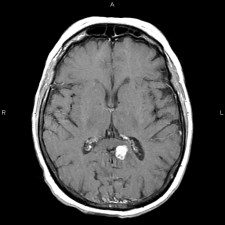

Label: no


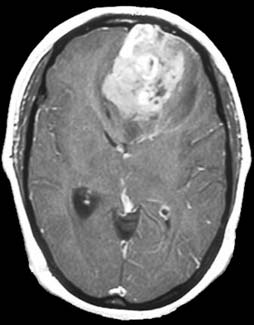

Label: yes


In [3]:
from IPython.display import Image, display

# List of sub-directories or files in dataset_path
subdirectories = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

# Iterates through each sub-directory and displays one image from each sub-directory
for subdirectory in subdirectories:
    subdirectory_path = os.path.join(dataset_path, subdirectory)

    # Fetch one image file from each sub-directory
    image_files = [f for f in os.listdir(subdirectory_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    if image_files:
        # Fetch the first image from each sub-directory
        sample_image_path = os.path.join(subdirectory_path, image_files[0])

        # Displays images with captions
        display(Image(filename=sample_image_path, width=200, height=200))
        print(f"Label: {subdirectory}")

# Melakukan Augmentasi Gambar

Augmentasi gambar adalah teknik yang digunakan dalam pembelajaran mesin, khususnya dalam pelatihan model jaringan saraf konvolusional (Convolutional Neural Networks, CNN), untuk meningkatkan ukuran dan keragaman dataset tanpa perlu mengumpulkan data baru.

In [4]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split=0.4)

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array

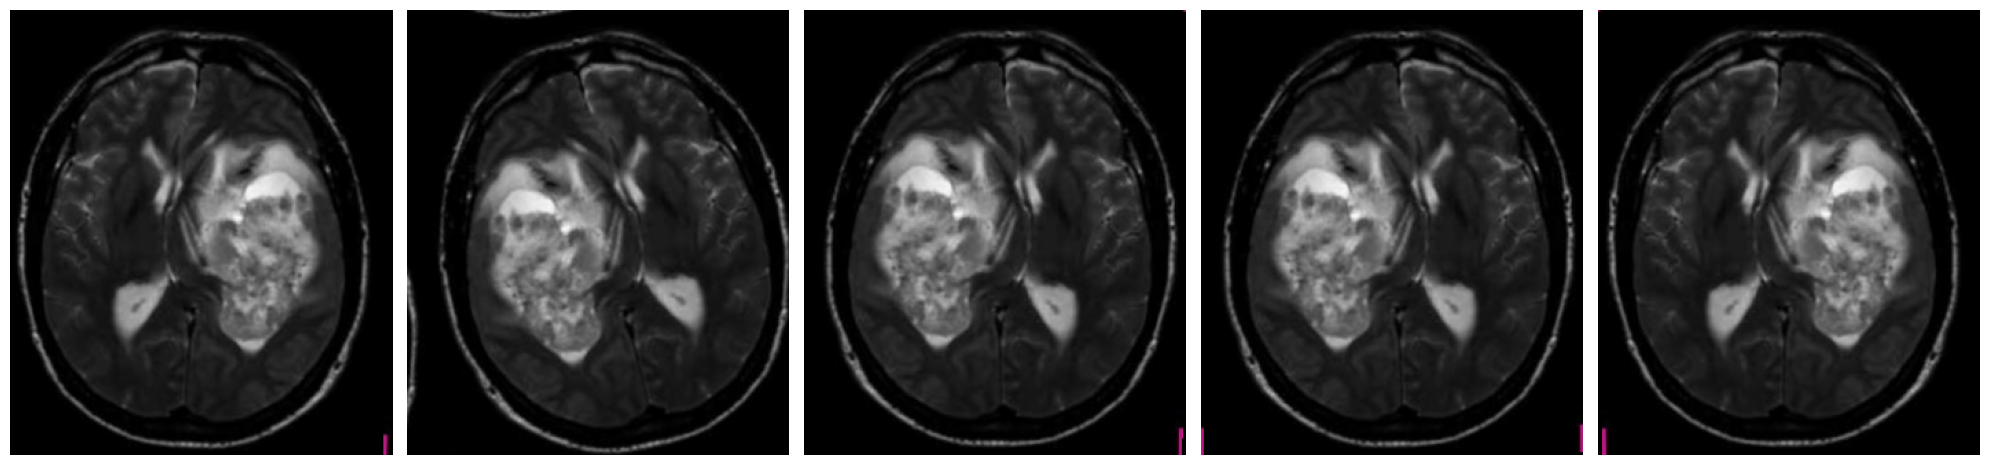

In [6]:
# Load a sample image for demonstration
sample_image_path = "/content/drive/My Drive/Brain/yes/Y259.JPG"  # Replace with the path to your image
img = load_img(sample_image_path)  # Load the image
x = img_to_array(img)  # Convert the image to an array
x = np.expand_dims(x, axis=0)  # Expand dimensions to match the shape expected by ImageDataGenerator

# Create an iterator for generating augmented images
augmented_images = train_datagen.flow(x, batch_size=1)

# Plot the augmented images
fig, axes = plt.subplots(1, 5, figsize=(20, 20))
axes = axes.flatten()
for img, ax in zip(augmented_images, axes):
    ax.imshow(img[0])
    ax.axis('off')
    if len(augmented_images) >= 5:
        break
plt.tight_layout()
plt.show()

In [7]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(100, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(100, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 152 images belonging to 2 classes.
Found 101 images belonging to 2 classes.


In [8]:
# Convert generators to tf.data.Dataset
train_dataset = tf.data.Dataset.from_generator(
    lambda: train_generator,
    output_types=(tf.float32, tf.float32),
    output_shapes=([None, 100, 150, 3], [None, 2])
).repeat()

validation_dataset = tf.data.Dataset.from_generator(
    lambda: validation_generator,
    output_types=(tf.float32, tf.float32),
    output_shapes=([None, 100, 150, 3], [None, 2])
).repeat()

Instructions for updating:
Use output_signature instead
Instructions for updating:
Use output_signature instead


# Melatih Model dengan Algortima CNN

Convolutional Neural Network (CNN) adalah jenis arsitektur jaringan saraf tiruan yang sangat efektif dalam mengenali pola dalam data yang memiliki struktur grid, seperti gambar. CNN dirancang khusus untuk memproses data gambar, dan telah menjadi standar de facto untuk berbagai tugas dalam visi komputer, seperti pengenalan objek, deteksi wajah, dan segmentasi gambar.

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')

])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

Epoch 1/20
4/4 - 29s - 7s/step - accuracy: 0.6016 - loss: 1.8644 - val_accuracy: 0.3958 - val_loss: 0.9397
Epoch 2/20
4/4 - 3s - 744ms/step - accuracy: 0.3833 - loss: 0.8241 - val_accuracy: 0.4058 - val_loss: 0.7038
Epoch 3/20
4/4 - 4s - 1s/step - accuracy: 0.5750 - loss: 0.6841 - val_accuracy: 0.6812 - val_loss: 0.6417
Epoch 4/20
4/4 - 4s - 1s/step - accuracy: 0.6083 - loss: 0.6389 - val_accuracy: 0.6232 - val_loss: 0.6143
Epoch 5/20
4/4 - 3s - 868ms/step - accuracy: 0.6417 - loss: 0.6050 - val_accuracy: 0.7604 - val_loss: 0.5467
Epoch 6/20
4/4 - 5s - 1s/step - accuracy: 0.7266 - loss: 0.5464 - val_accuracy: 0.6377 - val_loss: 0.6181
Epoch 7/20
4/4 - 5s - 1s/step - accuracy: 0.7167 - loss: 0.6037 - val_accuracy: 0.6812 - val_loss: 0.7991
Epoch 8/20
4/4 - 4s - 974ms/step - accuracy: 0.7667 - loss: 0.5074 - val_accuracy: 0.7826 - val_loss: 0.4956
Epoch 9/20
4/4 - 3s - 725ms/step - accuracy: 0.8000 - loss: 0.5116 - val_accuracy: 0.7604 - val_loss: 0.5720
Epoch 10/20
4/4 - 3s - 728ms/step

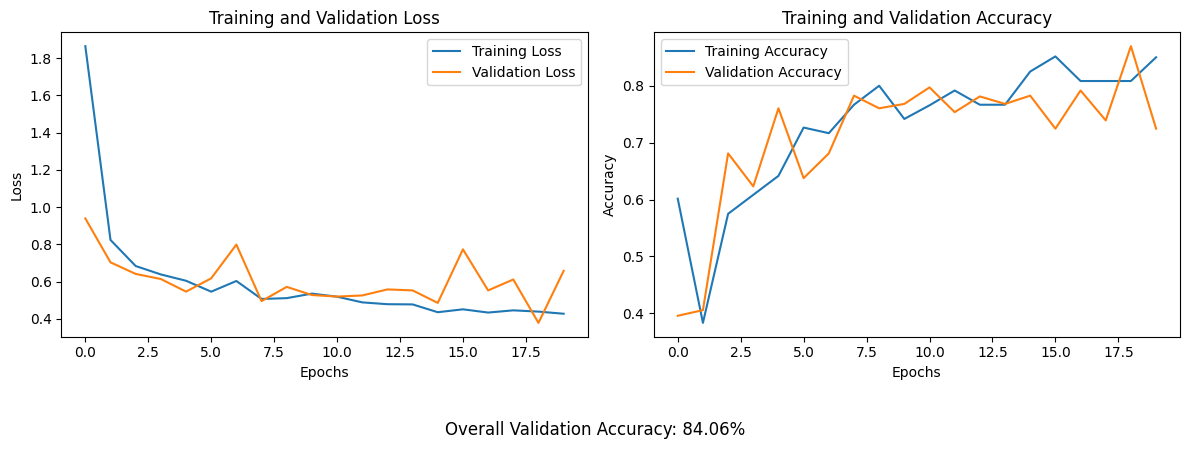

In [11]:
import matplotlib.pyplot as plt

# Fit the model and store the history
history = model.fit(
    train_dataset,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_dataset,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    verbose=2
)

# Evaluate the model on the validation dataset
overall_loss, overall_accuracy = model.evaluate(validation_dataset, steps=validation_generator.samples // validation_generator.batch_size)
print(f'Overall Validation Accuracy: {overall_accuracy * 100:.2f}%')

# Plot the training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Add overall accuracy to the plot
plt.figtext(0.5, -0.1, f'Overall Validation Accuracy: {overall_accuracy * 100:.2f}%', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

In [12]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

# Implementasi dengan Data Testing

Saving N3.jpg to N3.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
N3.jpg
Terdeteksi Tidak Tumor


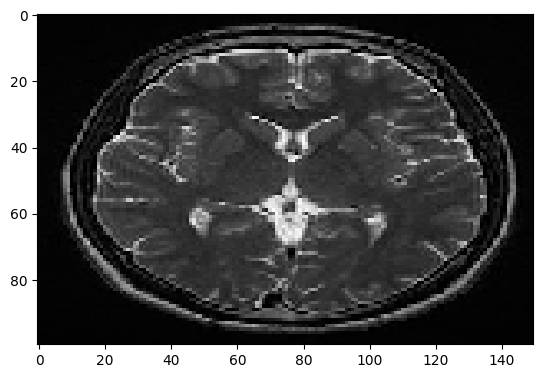

In [13]:
# Memuat gambar yang akan diprediksi
uploaded = files.upload()

for fn in uploaded.keys():
    # Memprediksi Gambar
    path = fn
    img = image.load_img(path, target_size=(100,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    print(fn)
    if classes[0][0] > classes[0][1]:
        print('Terdeteksi Tidak Tumor')
    else:
        print('Terdeteksi Tumor')

In [14]:
from keras.models import load_model

model.save('model_brain_cnn.h5')

In [15]:
from google.colab import files
files.download('model_brain_cnn.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>